# Работа с целевой переменной

# Содержание работы

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


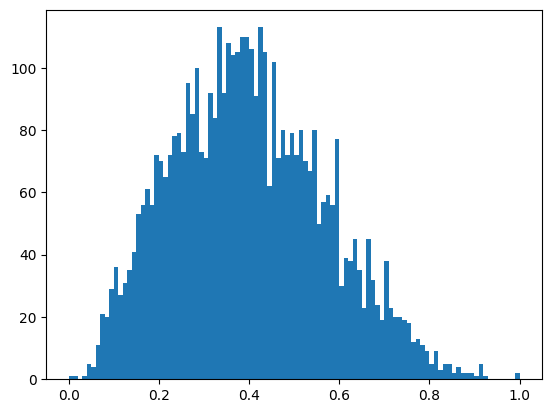

In [7]:
plt.hist(df.target, 100)
_ = plt.plot()

### 2. Постройте простую модель регрессии и оцените ее качество.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression


baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.651134077674007

(0.0, 8.0)

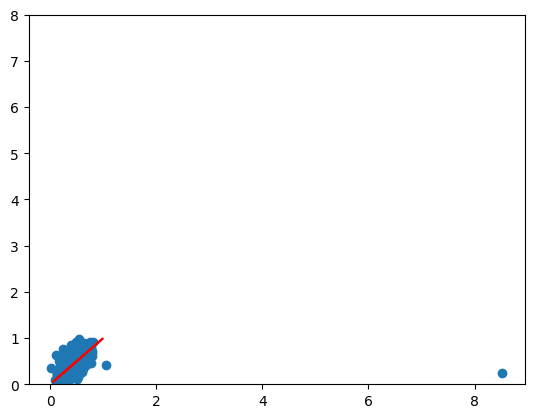

In [10]:
yy = baseline.predict(X_test)

plt.scatter(yy, y_test)
plt.plot(y_test, y_test, c='r')
plt.ylim(0, 8)

### 3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

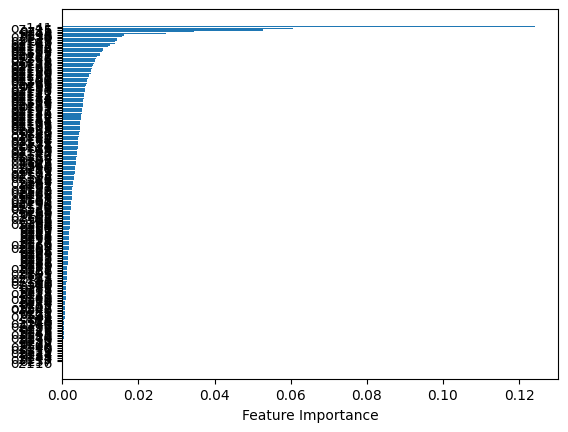

In [12]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [13]:
rf.feature_importances_[sort][-10:]

array([0.01388093, 0.01429425, 0.01429583, 0.01579696, 0.01614655,
       0.02732015, 0.03461887, 0.05264596, 0.06052042, 0.12408091])

In [14]:
df.data.columns[sort][-10:]

Index(['oz112', 'oz8', 'oz137', 'oz20', 'oz198', 'oz18', 'oz48', 'oz35',
       'oz15', 'oz141'],
      dtype='object')

In [15]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz155,oz201,oz12,oz157,oz195,oz154,oz109,oz158,oz162,oz197,oz112,oz8,oz137,oz20,oz198,oz18,oz48,oz35,oz15,oz141
0,0.752291,0.127564,0.227174,0.000000,0.056880,0.030205,0.076923,0.800120,0.319206,0.505899,0.000000,0.060606,0.000000,0.000000,0.039213,0.0625,0.312855,0.0,0.000000,0.041308
1,0.745984,0.475618,0.761155,0.000281,0.287438,0.016908,0.153846,0.791224,0.306084,0.683820,0.222222,0.373737,0.278945,0.242424,0.326584,0.0625,0.297041,0.4,0.282828,0.212274
2,0.753298,0.497968,0.217078,0.001852,0.117431,0.006922,0.076923,0.798276,0.406309,0.499219,0.000000,0.212121,0.000000,0.388889,0.204885,0.1250,0.288557,0.0,0.388889,0.063643
3,0.767469,0.134458,0.485033,0.000158,0.145349,0.001240,0.076923,0.800965,0.327848,0.630533,0.000000,0.171717,0.039437,0.095238,0.023469,0.0000,0.310692,0.1,0.111111,0.031193
4,0.741548,0.295913,0.279239,0.000037,0.067583,0.011829,0.076923,0.802893,0.329857,0.516053,0.000000,0.101010,0.000000,0.260870,0.111398,0.0625,0.286581,0.0,0.304348,0.063643


### 4. Постройте модель на оставшихся данных и оцените ее качество.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.651134077674007


0.4150025384928533

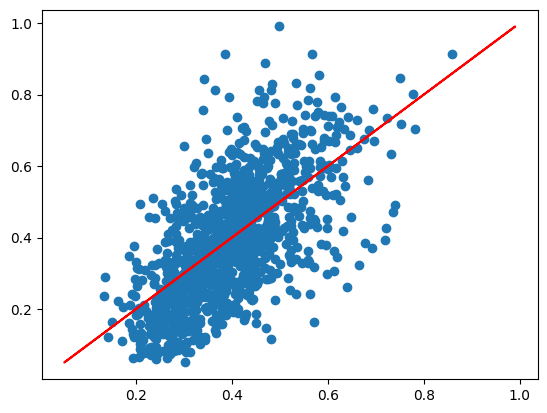

In [17]:
yy = better.predict(X_test)

plt.scatter(yy, y_test)
plt.plot(y_test, y_test, c='r')

In [18]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 59)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.651134077674007


0.4377635557067219

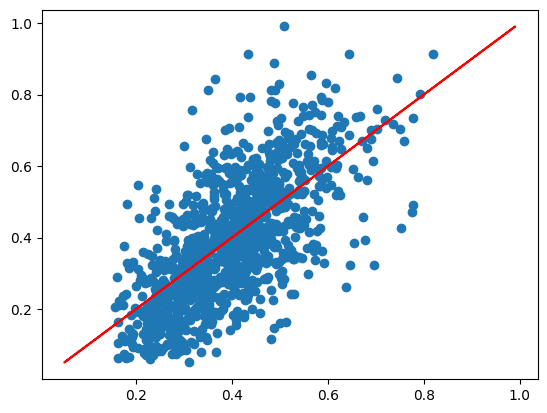

In [20]:
yy = better.predict(X_test)

plt.scatter(yy, y_test)
plt.plot(y_test, y_test, c='r')

### 7. Загрузите датасет для классификации. Постройте распределение целевой переменной.


In [21]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


(array([ 49.,   0.,   0.,   0.,   0., 288.,   0.,   0.,   0., 288.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

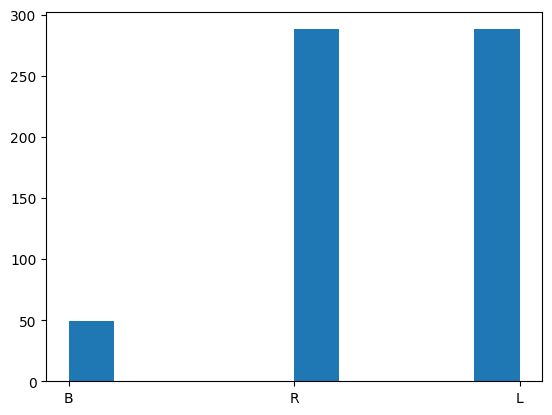

In [22]:
plt.hist(df.target)

### 8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

(array([72.,  0.,  0.,  0.,  0., 73.,  0.,  0.,  0., 12.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

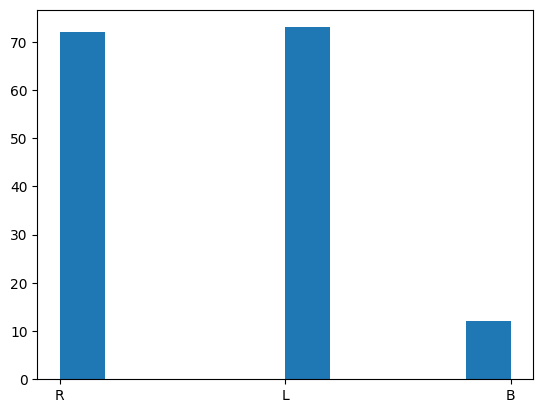

In [24]:
plt.hist(y_test)

In [25]:
from sklearn.linear_model import LogisticRegression


baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [27]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


### 9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.

In [28]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': 4.216216216216216, 'L': 0.7255813953488373, 'R': 0.7222222222222222}

In [29]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [30]:
print(classification_report(y_test, weighted.predict(X_test)))
print(confusion_matrix(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157

[[11  0  1]
 [ 4 67  2]
 [ 3  2 67]]


### 10. Выравняйте распределение классов путем оверсемплинга с повторением

In [31]:
y_train.value_counts()

R    216
L    215
B     37
Name: class, dtype: int64

In [32]:
X_train["target"] = y_train

In [33]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [34]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


(array([216.,   0.,   0.,   0.,   0., 215.,   0.,   0.,   0., 216.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

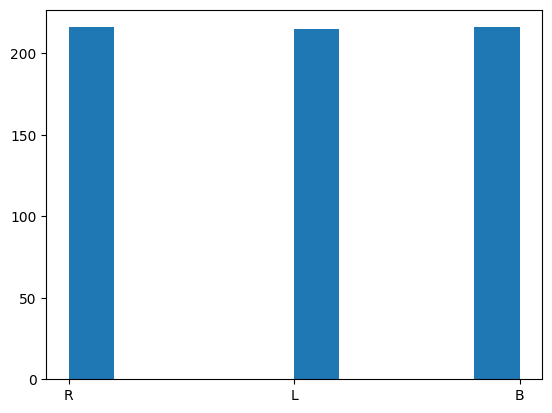

In [35]:
plt.hist(oversampled["target"])

In [36]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [37]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [38]:
print(classification_report(y_test, weighted.predict(X_test)))
print(confusion_matrix(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157

[[11  0  1]
 [ 4 67  2]
 [ 3  2 67]]


### 5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.

In [39]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

/tmp/ipykernel_1765/1011001378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,1,0,0,0,0,1,0
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,0,1,0,0,0,1,0
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,0,0,1,0,0,1,0
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,0,0,0,1,0,0,1
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,1,0,0,0,1,0,0


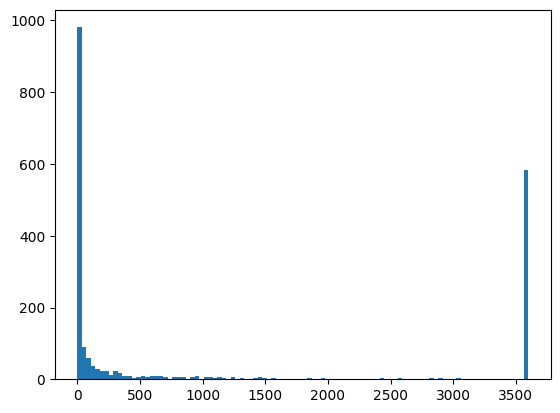

In [40]:
plt.hist(df.target, 100)
_ = plt.plot()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

### 6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

(array([1049.,    0.,   62.,    0.,    0.,   29.,    0.,   17.,    0.,
         424.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

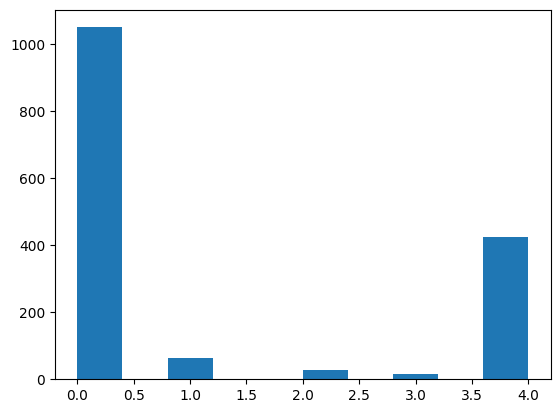

In [43]:
plt.hist(y_binned)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


(array([316.,   0.,   0., 316.,   0.,   0., 316.,   0.,   0., 633.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

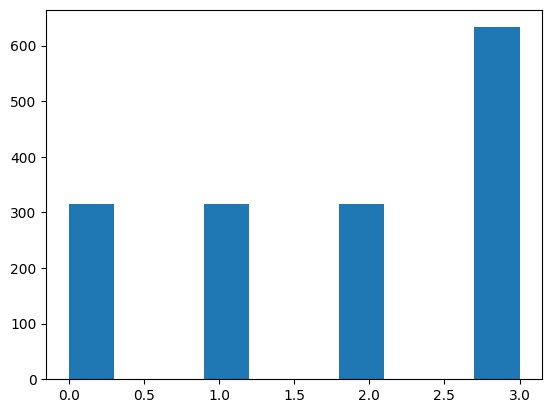

In [44]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))
plt.hist(y_binned)

# Задания для самостоятельной работы

### 1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

In [45]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


df = fetch_openml("mtp", version=1)
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

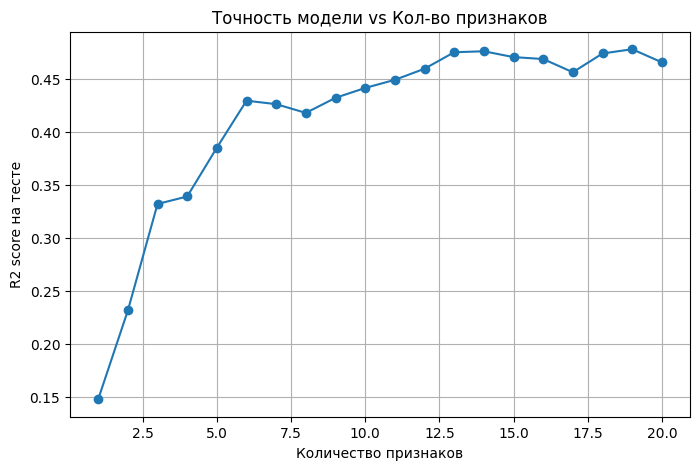

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


rf = RandomForestRegressor(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

scores = []

for k in range(1, 21):
    top_k_features = X_train.columns[sorted_idx[:k]]
    
    rf_k = RandomForestRegressor(n_estimators=15, random_state=42)
    rf_k.fit(X_train[top_k_features], y_train)
    y_pred = rf_k.predict(X_test[top_k_features])
    
    score = r2_score(y_test, y_pred)
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), scores, marker='o')
plt.title("Точность модели vs Кол-во признаков")
plt.xlabel("Количество признаков")
plt.ylabel("R2 score на тесте")
plt.grid(True)
plt.show()

### 2. Используйте другие методы отбора признаков

In [47]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFE, SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


df = fetch_openml("mtp", version=1, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

# 1. Исключение низкодисперсных признаков
vt = VarianceThreshold(threshold=0.01)
X_train_vt = vt.fit_transform(X_train_scaled)
X_test_vt = vt.transform(X_test_scaled)
print("Исключение низкодисперсных признаков R²:", r2_score(y_test, model.fit(X_train_vt, y_train).predict(X_test_vt)))

# 2. Отбор по F-тесту
skb_f = SelectKBest(score_func=f_regression, k=10)
X_train_f = skb_f.fit_transform(X_train_scaled, y_train)
X_test_f = skb_f.transform(X_test_scaled)
print("Отбор по F-тесту R²:", r2_score(y_test, model.fit(X_train_f, y_train).predict(X_test_f)))

# 3. Рекурсивное исключение признаков (RFE)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)
print("RFE R²:", r2_score(y_test, model.fit(X_train_rfe, y_train).predict(X_test_rfe)))

# 4. Последовательное включение признаков (SFS)
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=10, direction='forward')
X_train_sfs = sfs.fit_transform(X_train_scaled, y_train)
X_test_sfs = sfs.transform(X_test_scaled)
print("SFS R²:", r2_score(y_test, model.fit(X_train_sfs, y_train).predict(X_test_sfs)))

# 5. L1-регуляризация (Lasso)
lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
sfm = SelectFromModel(lasso, prefit=True)
X_train_l1 = sfm.transform(X_train_scaled)
X_test_l1 = sfm.transform(X_test_scaled)
print("L1 (Lasso) R²:", r2_score(y_test, model.fit(X_train_l1, y_train).predict(X_test_l1)))


Исключение низкодисперсных признаков R²: -1.6511340760496669
Отбор по F-тесту R²: 0.2544607141087718
RFE R²: 0.07423548969595073
SFS R²: 0.4295357751190132
L1 (Lasso) R²: 0.4076872058221278


### 3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.

In [48]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

df = fetch_openml("balance-scale", version=1)

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Оверсемплинг
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# Андерсемплинг
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

model = LogisticRegression()

print("Оригинальная выборка:")
model.fit(X_train_scaled, y_train)
print(classification_report(y_test, model.predict(X_test_scaled)))

print("\nПосле SMOTE (оверсемплинг):")
model.fit(X_smote, y_smote)
print(classification_report(y_test, model.predict(X_test_scaled)))

print("\nПосле RandomUnderSampler (андерсемплинг):")
model.fit(X_rus, y_rus)
print(classification_report(y_test, model.predict(X_test_scaled)))

Оригинальная выборка:
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.93      0.90        73
           R       0.86      0.94      0.90        72

    accuracy                           0.87       157
   macro avg       0.58      0.63      0.60       157
weighted avg       0.80      0.87      0.83       157


После SMOTE (оверсемплинг):
              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157


После RandomUnderSampler (андерсемплинг):
              precision    recall  f1-score   support

           B       0.35      0.92      0.51        12
           L       1.00      0.79  

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

### 4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.

In [49]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")


df = fetch_openml("CPMP-2015-regression", version=1, as_frame=True)
df.data.drop(["instance_id"], axis=1, inplace=True)
X = pd.get_dummies(df.data)
y = df.target.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print("Регрессия (baseline): RMSE =", np.sqrt(mean_squared_error(y_test, y_pred)))

for strategy in ["uniform", "quantile", "kmeans"]:
    for bins in [3, 5, 7]:
        kb = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=strategy)
        y_train_binned = kb.fit_transform(y_train.values.reshape(-1, 1)).ravel().astype(int)
        y_test_binned = kb.transform(y_test.values.reshape(-1, 1)).ravel().astype(int)

        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train_scaled, y_train_binned)
        y_pred_binned = clf.predict(X_test_scaled)

        print(f"Классификация: strategy={strategy}, bins={bins} -> Accuracy = {accuracy_score(y_test_binned, y_pred_binned):.3f}, F1 = {f1_score(y_test_binned, y_pred_binned, average='macro'):.3f}")



Регрессия (baseline): RMSE = 472.9842891799261
Классификация: strategy=uniform, bins=3 -> Accuracy = 0.941, F1 = 0.676
Классификация: strategy=uniform, bins=5 -> Accuracy = 0.922, F1 = 0.462
Классификация: strategy=uniform, bins=7 -> Accuracy = 0.896, F1 = 0.323
Классификация: strategy=quantile, bins=3 -> Accuracy = 0.837, F1 = 0.828
Классификация: strategy=quantile, bins=5 -> Accuracy = 0.725, F1 = 0.646
Классификация: strategy=quantile, bins=7 -> Accuracy = 0.660, F1 = 0.572
Классификация: strategy=kmeans, bins=3 -> Accuracy = 0.924, F1 = 0.753
Классификация: strategy=kmeans, bins=5 -> Accuracy = 0.907, F1 = 0.544
Классификация: strategy=kmeans, bins=7 -> Accuracy = 0.843, F1 = 0.389


Дискретизация целевой переменной (биннинг) снижает точность по сравнению с исходной регрессией (RMSE = 472.98), особенно при увеличении количества бинов. Accuracy при классификации может быть высокой, но F1-score падает, что указывает на дисбаланс классов. 
Стратегия `quantile` даёт лучший F1 при 3 бинах (0.828), что указывает на хорошее балансирование классов.
Стратегия `kmeans` также показывает высокий F1 при 3 бинах (0.753) с высокой accuracy.
Однако при увеличении числа бинов все стратегии показывают снижение качества классификации.
Оптимальный баланс между точностью и F1 наблюдается при `quantile`, `bins=3`.

# Контрольные вопросы

**Какие модели лучше всего можно использовать для отбора признаков? Почему другие нельзя или нежелательно?**  
Лучше всего для отбора признаков использовать модели с встроенной оценкой важности, например, деревья решений (RandomForest, GradientBoosting) и линейные модели с регуляризацией (Lasso, Ridge), потому что они учитывают влияние признаков при обучении. Другие модели, как KNN или SVM без ядра, не предоставляют информации о важности признаков, и их отбор может быть менее обоснован.

**Зачем нужен этап отбора признаков? В каких случаях без него не обойтись? А в каких его можно пропустить?**  
Этап отбора признаков нужен для улучшения обобщающей способности модели, уменьшения переобучения и ускорения обучения. Он необходим при большом количестве признаков и малом объёме данных, но может быть опущен при небольшом количестве качественных признаков.

**Какие есть методы отбора признаков? Найдите и опишите не менее пяти.**  
Методы отбора признаков: отбор по важности (feature importance), отброс признаков с низкой дисперсией (VarianceThreshold), рекурсивное исключение признаков (RFE), отбор по статистике (SelectKBest, chi2, ANOVA), отбор по L1-регуляризации (Lasso).

**Какие есть стратегии устранения дисбаланса классов? В каких случаях стоит применять их и от чего зависит выбор стратегии?**  
Стратегии устранения дисбаланса: андерсемплинг (уменьшение числа объектов мажоритарного класса), оверсемплинг (добавление объектов миноритарного), синтетические методы (SMOTE, ADASYN), взвешивание классов, генерация данных. Выбор зависит от размера выборки, степени дисбаланса и чувствительности модели.

**Какие модели машинного обучения из библиотеки sklearn поддерживают веса классов?**  
Классовые веса поддерживают: LogisticRegression, RandomForest, GradientBoostingClassifier, DecisionTreeClassifier, SVC, SGDClassifier и другие модели с параметром `class_weight`.

**Зачем использовать дискретизацию непрерывной целевой переменной? В каких случаях это оправданно, а в каких — нет?**  
Дискретизация целевой переменной используется для преобразования задачи регрессии в классификацию, когда интересуют интервалы значений, а не точные числа. Она оправдана для упрощения задачи или повышения устойчивости, но нецелесообразна, если важна точная числовая предсказательная цель.

**Почему дискретизацию целевой переменной нужно делать только после разделения на тестовую и обучающую подвыборки? Что такое утечка данных?**  
Дискретизацию нужно делать только после разделения, чтобы избежать утечки данных — это ситуация, когда информация из тестовой выборки попадает в обучение, что приводит к переоценке качества модели и искажению результатов.